# Counsel Chat dataset

This dataset is extracted from a therapist expert community, counselchat.com. It is a platform to help counselors build their reputation and make meaningful contact with potential clients. On the site, therapists respond to questions posed by clients, and users can like responses that they find most helpful.

**Categories:**

- `questionID`.
- `questionTitle`.
- `questionText`.
- `questionUrl`.
- `topics`.
- `therapistName`.
- `therapistUrl`.
- `answerText`.
- `upvotes`.
- `views`.
- `split`.

An advantage over other datasets is the field `upvotes` which can be useful to later validate.

## Libraries

In [39]:
!pip install datasets huggingface-hub powerlaw

In [ ]:
!huggingface-cli login

In [2]:
#from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict, load_dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load dataset

In [4]:
path_route = '/content/drive/MyDrive/TFM/data/counselchat'

In [ ]:
df1 = pd.read_csv(f'{path_route}/20200325_counsel_chat.csv',
                  index_col=0)
df1

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train
...,...,...,...,...,...,...,...,...,...,...,...
2124,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Victoria HaagFind direction for your life...,https://counselchat.com/therapists/victoria-haag,There are probably no two therapists alike bec...,0,45,train
2125,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Allison VelezIs your relationship worth it?,https://counselchat.com/therapists/allison-velez,"Each counselor may have a different process, s...",0,37,train
2126,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,David RouttPresident and Clinical Counselor at...,https://counselchat.com/therapists/david-routt,"After meeting a client, many Counselors will a...",0,56,train
2127,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,2nd Chance Counseling Service Online Addiction...,https://counselchat.com/therapists/2nd-chance-...,A good therapist will discuss what brought you...,0,27,train


## Data exploration

Dataset is compound of 2129 rows and 12 columns.

### Categories

There are 307 different therapists. There are 31 different topics.

In [ ]:
len(df1['therapistURL'].unique())

307

In [ ]:
len(df1['topic'].unique())

31

Despite there is 2129 rows, there are 815 questions. Additioanlly, there are 818 question titles and 824 questions texts. So, there are some questions that are identical but have two or more IDs.

In [ ]:
len(df1['questionText'].unique())

824

In [ ]:
len(df1['questionTitle'].unique()) # question topics

818

In [ ]:
len(df1['questionID'].unique())

815

In [ ]:
# Group by 'questionText' and collect unique 'questionID's
grouped = df1.groupby('questionText')['questionID'].nunique()

# Filter groups where the count of unique 'questionID' is 2 or more
duplicates = grouped[grouped > 1]

# Check the results
if not duplicates.empty:
    print("There are 'questionText' entries with two or more different 'questionID's:")
    print(duplicates)
else:
    print("All 'questionText' entries have a unique 'questionID'.")

There are 'questionText' entries with two or more different 'questionID's:
questionText
After he got home from the hospital he was angry, then for a time wonderful. Now he is depressed and hopeless again.                                                                                                                                                                                                                                                                        2
How does a counselor decide when to end counseling sessions or to terminate working with a client?                                                                                                                                                                                                                                                                                          2
I had a very troubled up bringing and I'm currently dealing with alot right now. I know some people may not think so, but to me its a lot. I feel ov

Let's see what happens:

In [ ]:
df1[df1['questionText']=='After he got home from the hospital he was angry, then for a time wonderful. Now he is depressed and hopeless again.']

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
215,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question. This i...",2,478,train
216,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,Catherine HobsonFeelings are clues to growth a...,https://counselchat.com/therapists/catherine-h...,This is actually more common then we often rea...,2,353,train
217,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Frank TheusMA, LPC, NCC, CSAT",https://counselchat.com/therapists/frank-theus,I'm thankful to read your husband found care a...,2,305,train
218,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Sarah McIntyreSarah McIntyre, M.Ed., LPC",https://counselchat.com/therapists/sarah-mcintyre,This must be so difficult for both of you. Wa...,1,213,train
219,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Lynda MartensMarriage & Family Therapist, MSc,...",https://counselchat.com/therapists/ms-lynda-ma...,I appreciate that you are concerned about your...,1,270,train
220,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,Lovener WightmanNYC Counseling,https://counselchat.com/therapists/lovener-wig...,A failed suicide attempt is commonly thought o...,1,216,train
221,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Lauren Ostrowski, MA, LPC, NCC, DCC, CCTPI tai...",https://counselchat.com/therapists/lauren-ostr...,The fact that you're reaching out for help her...,1,138,train
222,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,Since as husband and wife your lives are close...,0,159,train
223,54,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,depression,"Vivian D. Echevarria Guzman, MSC, LPC-S, NCCBi...",https://counselchat.com/therapists/vivian-d-ec...,It seems like you are very receptive of your h...,0,155,train
1858,2,How can I help my husband after a suicide atte...,After he got home from the hospital he was ang...,https://counselchat.com/questions/how-can-i-he...,self-harm,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question. This i...",2,478,train


It seems that are duplicated rows. So, we delete them

In [ ]:
duplicates = grouped[grouped > 1].index

# Filter out rows where 'questionText' is in the list of duplicates
df1 = df1[~df1['questionText'].isin(duplicates)]

# Display the cleaned DataFrame
len(df1['questionID'].unique())
len(df1['questionTitle'].unique())
len(df1['questionText'].unique())

815

### Upvotes distribution

This is the `upvotes` distribution. It seems that most questions do not receive up votes.

In [ ]:
df1['upvotes'].describe()

count    1889.000000
mean        0.515087
std         0.971473
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: upvotes, dtype: float64

In [12]:
diagrams_route = "/content/drive/MyDrive/TFM/diagrams/counsel chat"

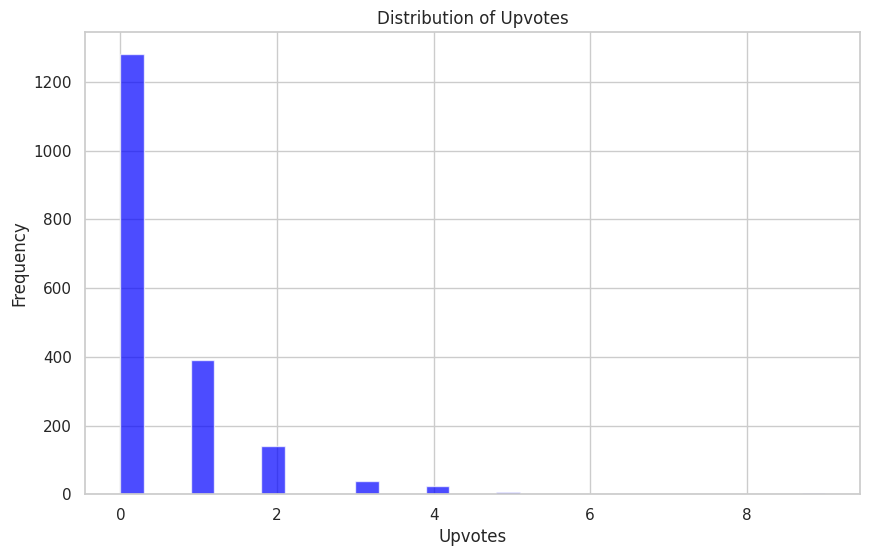

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df1['upvotes'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(f'{diagrams_route}/upvotes_dist.svg')
plt.show()

In fact, the upvotes distribution is completely skewed.

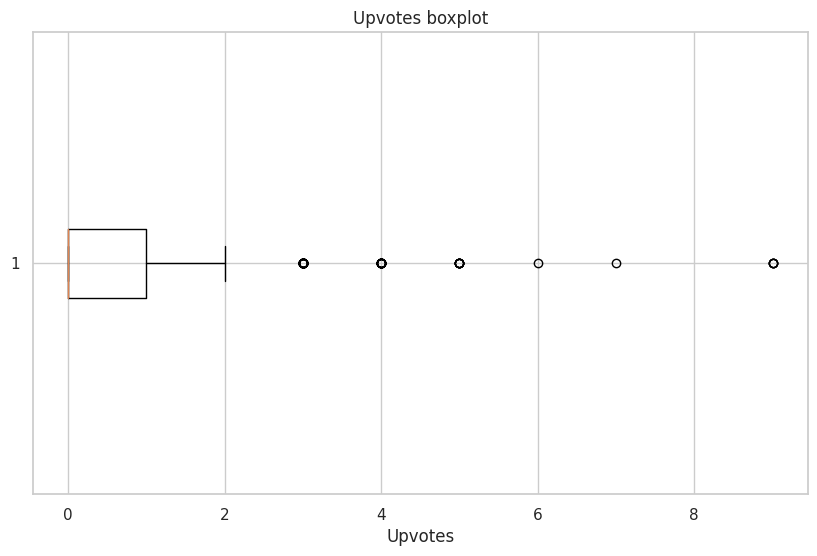

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df1['upvotes'], vert=False)
plt.title('Upvotes boxplot')
plt.xlabel('Upvotes')
plt.grid(True)
plt.savefig(f'{diagrams_route}/upvotes_boxplot.svg')
plt.show()

Let's see if the up votes are correlated with the question views:

In [ ]:
# Calculate Pearson Correlation
correlation, p_value = stats.pearsonr(df1['upvotes'], df1['views'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.3604915967254969
P-value: 4.608558060312122e-59


**Null and Alternative Hypotheses**

- **Null Hypothesis ($H_0$)**: There is no correlation between upvotes and views ($\rho = 0$).

- **Alternative Hypothesis ($H_1$):** There is a non-zero correlation between upvotes and views ($\rho \neq 0$).


It can be assumed that there is no correlation between views and upvotes. Graphically:

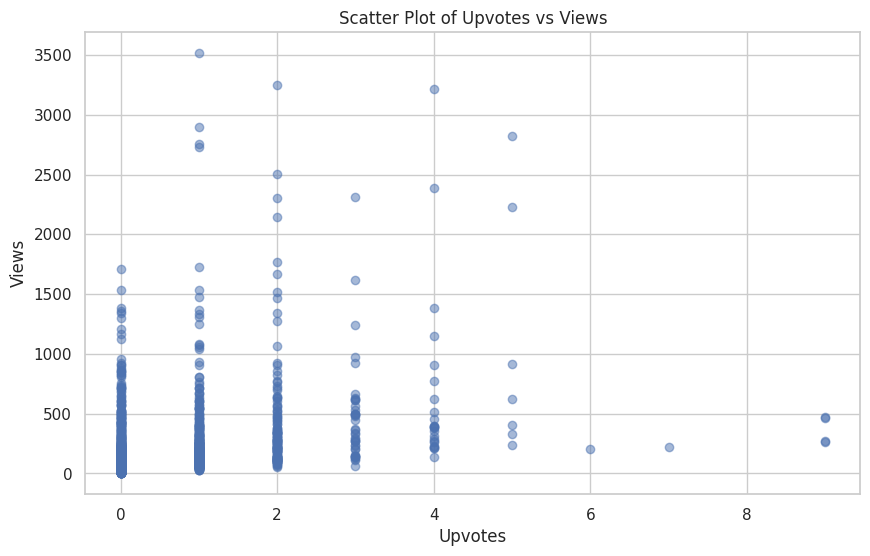

In [ ]:
# Scatter plot of upvotes vs views
plt.figure(figsize=(10, 6))
plt.scatter(df1['upvotes'], df1['views'], alpha=0.5)
plt.title('Scatter Plot of Upvotes vs Views')
plt.xlabel('Upvotes')
plt.ylabel('Views')
plt.grid(True)
plt.savefig(f'{diagrams_route}/upvotes_scatter.svg')
plt.show()

### Validation and train sets

It seems like the validation and train-test split is by default 90% / 10%, a bit poor.

In [ ]:
len(df1[df1['split']=='train'])

1639

In [ ]:
len(df1[df1['split']=='val'])

171

Analyzing these sets, it can be seen that validation and train data are chategorized almost randomly. Validation data sometimes does not correspond with any data in training set. So, it is preferrable to build our training-test sets.

### Topic visualization

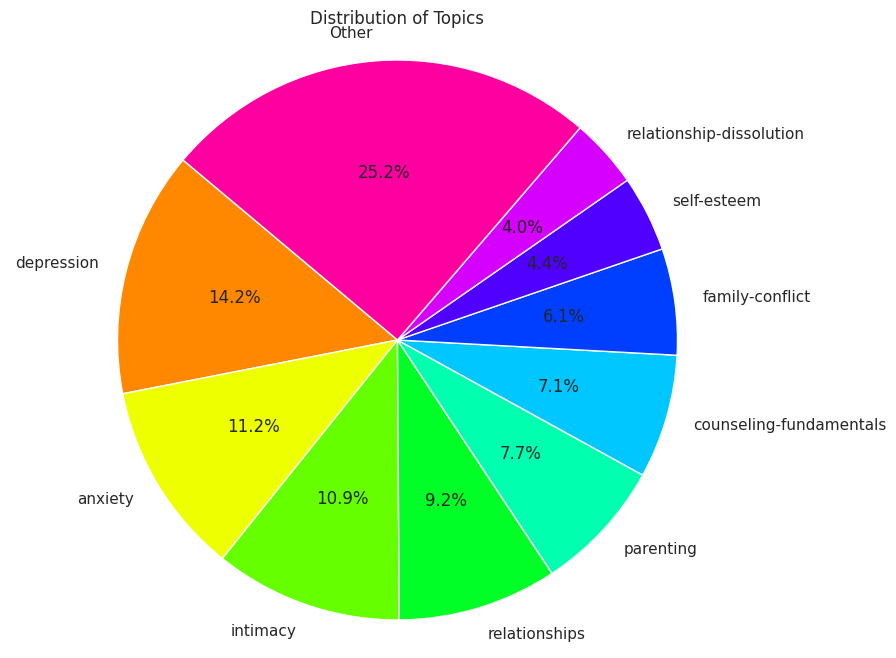

In [ ]:
import seaborn as sns

# Count the occurrences of each topic
topic_counts = df1['topic'].value_counts()

maximum = len(topic_counts) - 21
# Group the 28 least common topics into "Other"
if len(topic_counts) > maximum:
    other_count = topic_counts.iloc[maximum:].sum()
    topic_counts = topic_counts.iloc[:maximum]
    topic_counts['Other'] = other_count

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("hsv", len(topic_counts)))
plt.title('Distribution of Topics')
plt.axis('equal')  # This makes the pie chart circular.
plt.savefig(f'{diagrams_route}/topics_dist.svg')
plt.show()

### Formating and obtaining the name

In [ ]:
def format_therapist_name(url):
    name_part = url.split('/')[-1]  # Split the URL and get the last part
    formatted_name = name_part.replace('-', ' ').title()  # Replace dashes and capitalize
    return formatted_name

# Apply the function to the 'therapistURL' column and create a new 'therapistName' column
df1['therapistName'] = df1['therapistURL'].apply(format_therapist_name)

# Display the updated DataFrame to verify the new column
df1

<ipython-input-61-ce7b6f3867c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['therapistName'] = df1['therapistURL'].apply(format_therapist_name)


,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split,therapistName
0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train,Sherry Katz Lcsw
1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train,Robin Landwehr Dbh Lpcc Ncc
2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train,Lee King
3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train,Shauntai Davis Yeargin
4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train,Jordan White
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Victoria HaagFind direction for your life...,https://counselchat.com/therapists/victoria-haag,There are probably no two therapists alike bec...,0,45,train,Victoria Haag
2125,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Allison VelezIs your relationship worth it?,https://counselchat.com/therapists/allison-velez,"Each counselor may have a different process, s...",0,37,train,Allison Velez
2126,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,David RouttPresident and Clinical Counselor at...,https://counselchat.com/therapists/david-routt,"After meeting a client, many Counselors will a...",0,56,train,David Routt
2127,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,2nd Chance Counseling Service Online Addiction...,https://counselchat.com/therapists/2nd-chance-...,A good therapist will discuss what brought you...,0,27,train,2Nd Chance Counseling Service Online Addiction...


In [ ]:
df1 = df1[['questionText', 'answerText', 'topic', 'upvotes']]
df1.columns = ['Context', 'Response', 'Topic', 'UpVotes']
df1.head()

,Context,Response,Topic,UpVotes
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",depression,1
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",depression,1
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,depression,0
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,depression,0
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,depression,0


In [ ]:
df1

,Context,Response,Topic,UpVotes
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",depression,1
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",depression,1
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,depression,0
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,depression,0
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,depression,0
...,...,...,...,...
2124,"After first meeting the client, what is the pr...",There are probably no two therapists alike bec...,counseling-fundamentals,0
2125,"After first meeting the client, what is the pr...","Each counselor may have a different process, s...",counseling-fundamentals,0
2126,"After first meeting the client, what is the pr...","After meeting a client, many Counselors will a...",counseling-fundamentals,0
2127,"After first meeting the client, what is the pr...",A good therapist will discuss what brought you...,counseling-fundamentals,0


In [ ]:
len(df1['Context'].unique())

815

## Download dataset and upload to Huggingface

In [ ]:
download_path = '/content/drive/MyDrive/TFM/data/my data'

### Generating `test` and `train` sets

In [ ]:
strat_sample = df1.groupby('Topic').apply(lambda x: x.sample(1))
strat_sample.index = strat_sample.index.droplevel(0)

remaining = df1.drop(strat_sample.index)

train, test = train_test_split(remaining, test_size=0.2, random_state=42, stratify=remaining['Topic'])

train = pd.concat([strat_sample, train])

print(train['Topic'].value_counts())
print(test['Topic'].value_counts())

train.to_csv(f'{download_path}/train_set.csv', index=False)
test.to_csv(f'{download_path}/test_set.csv', index=False)

Topic
depression                  214
anxiety                     169
intimacy                    164
relationships               139
parenting                   116
counseling-fundamentals     108
family-conflict              93
self-esteem                  67
relationship-dissolution     61
trauma                       53
behavioral-change            41
marriage                     37
lgbtq                        31
anger-management             31
substance-abuse              28
spirituality                 27
workplace-relationships      21
domestic-violence            17
social-relationships         16
grief-and-loss               15
diagnosis                    15
professional-ethics          10
eating-disorders              8
sleep-improvement             8
legal-regulatory              7
stress                        6
children-adolescents          5
addiction                     4
military-issues               3
human-sexuality               3
Name: count, dtype: int64
Topic
de

In [ ]:
# Convert to Dataset format
train_dataset = Dataset.from_csv(f'{download_path}/train_set.csv')
test_dataset = Dataset.from_csv(f'{download_path}/test_set.csv')

# Creat a DatasectDict to manage train and test sets
dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

## Assigning weights

I assign more weight to that responses which have more upvotes.

In [ ]:
# Load the dataset
dataset = load_dataset("andreshere/counsel_chat")

# Function to calculate and normalize weights
def calculate_weights(upvotes):
    smoothing_constant = 1
    smoothed_upvotes = [upvote + smoothing_constant for upvote in upvotes]
    total_upvotes = sum(smoothed_upvotes)
    weights = [upvote / total_upvotes for upvote in smoothed_upvotes]
    total_weight = sum(weights)
    normalized_weights = [weight / total_weight for weight in weights]
    normalized_weights[-1] += 1 - sum(normalized_weights)  # Ensure the sum is exactly 1
    return normalized_weights

# Process the train split
train_upvotes = dataset['train']['UpVotes']
train_weights = calculate_weights(train_upvotes)
dataset['train'] = dataset['train'].add_column("Weights", train_weights)

# Process the test split
test_upvotes = dataset['test']['UpVotes']
test_weights = calculate_weights(test_upvotes)
dataset['test'] = dataset['test'].add_column("Weights", test_weights)

# Save the updated dataset locally
dataset.save_to_disk("updated_counsel_chat")

### Upload to Huggingface

In [ ]:
dataset.push_to_hub("andreshere/counsel_chat")

### Using the dataset

In [6]:
dataset = load_dataset("andreshere/counsel_chat")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


Generating train split:   0%|          | 0/1517 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/372 [00:00<?, ? examples/s]

In [40]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Context', 'Response', 'Topic', 'UpVotes', 'Weights'],
        num_rows: 1517
    })
    test: Dataset({
        features: ['Context', 'Response', 'Topic', 'UpVotes', 'Weights'],
        num_rows: 372
    })
})